In [56]:
import pandas as pd
from standard_precip.spi import SPI
from standard_precip.utils import plot_index
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv("data\csv\Prec 1993-2023.csv", parse_dates=["Date"])
# data.set_index("Date", inplace=True)

In [58]:
spi = SPI()

In [59]:
df_spi = spi.calculate(
    data, "Date", "precipitation", freq="M", scale=3, fit_type="lmom", dist_type="gam"
)

Text(0, 0.5, 'SPI')

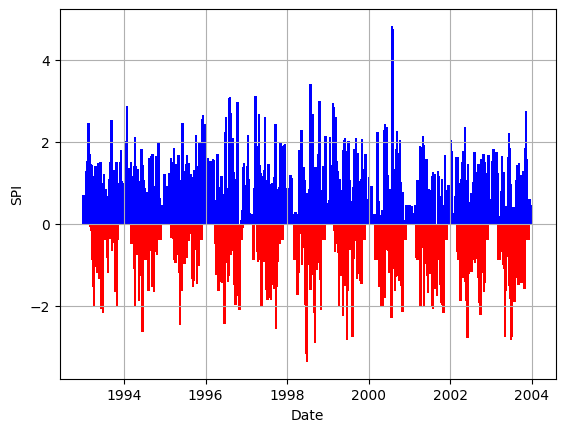

In [60]:
pos_index = df_spi.loc[df_spi["precipitation_scale_3_calculated_index"] >= 0]
neg_index = df_spi.loc[df_spi["precipitation_scale_3_calculated_index"] < 0]
fig, ax = plt.subplots()
ax.bar(
    pos_index["Date"],
    pos_index["precipitation_scale_3_calculated_index"],
    width=22,
    align="center",
    color="b",
)
ax.bar(
    neg_index["Date"],
    neg_index["precipitation_scale_3_calculated_index"],
    width=22,
    align="center",
    color="r",
)
ax.grid(True)
ax.set_xlabel("Date")
ax.set_ylabel("SPI")